## Homework 4: Data Visualization

- **Name**: Swarupa Rani Danthuluri
- **UB Username**: swarupar
- **Ub Person Number**: 50547373

### Question 1

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [4]:
data_frame = pd.read_csv('scatter_data.csv', comment="%", header=None)
data_frame.columns = ["x", "y"]
data_frame.head()

,x,y
0,95.954341,328.375777
1,60.162754,259.053445
2,52.754898,207.792989
3,88.034798,333.209632
4,80.271275,290.042475


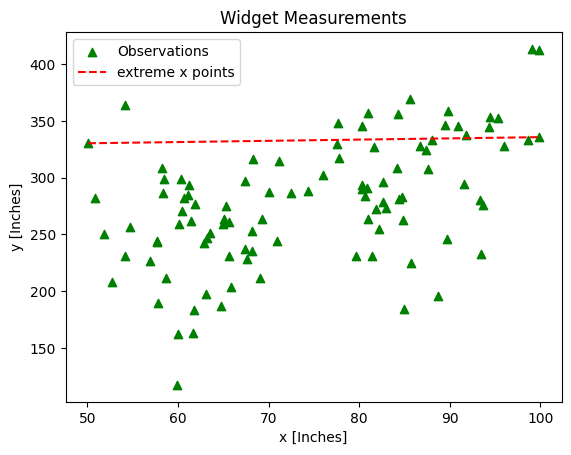

In [5]:
plt.scatter(x=data_frame['x'], y=data_frame['y'],marker='^',c='green', label='Observations')
plt.title("Widget Measurements")
plt.xlabel("x [Inches]")
plt.ylabel("y [Inches]")

min_x = data_frame['x'].min()
max_x = data_frame['x'].max()
y_min_x = data_frame.loc[data_frame['x'] == min_x, "y"].values[0]
y_max_x = data_frame.loc[data_frame['x'] == max_x, "y"].values[0]
plt.plot([min_x, max_x], [y_min_x, y_max_x], color="red", linestyle="--", label="extreme x points")

plt.legend()
plt.show()

### Question 2

In [6]:
data_frame = pd.read_csv('student_grades.csv', comment="%", header=None)
data_frame.columns = ["studentID", "avgScore"]
data_frame.head()

,studentID,avgScore
0,0,81.563259
1,1,67.426527
2,2,86.415197
3,3,80.387361
4,4,76.669249


In [7]:
def grade_mapping(x):
    if x<60:
        return 'F'
    elif (x>=60) and (x<70):
        return 'D'
    elif (x>=70) and (x<80):
        return 'C'
    elif (x>=80) and (x<90):
        return 'B'
    elif (x>=90) and (x<=100):
        return 'A'

In [8]:
data_frame['scoreBins'] = data_frame['avgScore'].apply(lambda x: grade_mapping(x))

In [9]:
df_bins = data_frame['scoreBins'].value_counts(sort=False).sort_index()

In [10]:
df_bins = df_bins.reindex(["F","D","C","B","A"])

In [11]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+0.5, y[i], ha = 'center')

Text(0.5, 0, 'Grade')

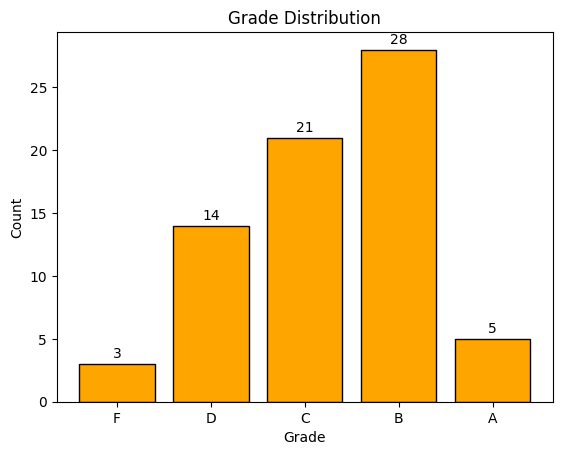

In [12]:
plt.bar(df_bins.index, df_bins.values, color='orange', edgecolor='black')
addlabels(df_bins.index, df_bins.values)
plt.title('Grade Distribution')
plt.ylabel('Count')
plt.xlabel('Grade')

### Question 3

In [16]:
data_frame = pd.read_csv('solution_data.csv', comment="%", header=None)
data_frame.columns = ["problemID","solutionApproach", "OFV"]

In [46]:
optimal_df = data_frame.loc[data_frame['solutionApproach']=='optimal'][['problemID','OFV']]
optimal_df.columns = ['problemID','optimalOFV']
merged_df = data_frame.merge(optimal_df, on='problemID', how='left')

merged_df['gap'] = ((merged_df['optimalOFV']-merged_df['OFV'])/merged_df['optimalOFV'])*100
merged_df = merged_df.loc[merged_df['solutionApproach']!='optimal']
avg_opt_gap = merged_df[['solutionApproach','gap']].groupby('solutionApproach').mean()

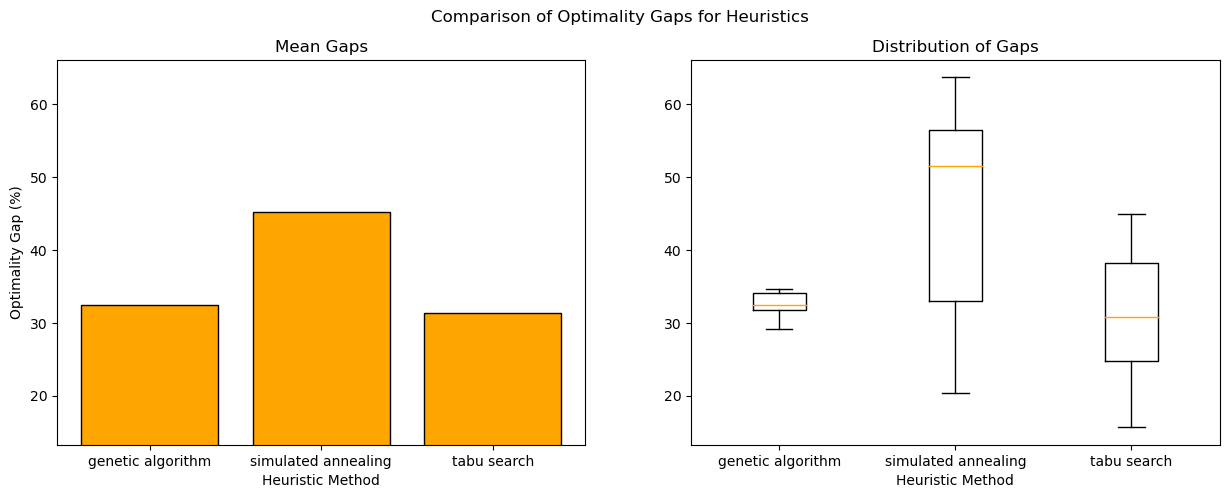

In [62]:

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].bar(avg_opt_gap.index, avg_opt_gap['gap'], color='orange', edgecolor='black')
axs[0].set_title('Mean Gaps')
axs[0].set_xlabel('Heuristic Method')
axs[0].set_ylabel('Optimality Gap (%)')

axs[1].boxplot(merged_df.groupby('solutionApproach')['gap'].apply(list), labels=merged_df['solutionApproach'].unique(), medianprops=dict(color='orange'))
axs[1].set_title('Distribution of Gaps')
axs[1].set_xlabel('Heuristic Method')

axs[0].set_ylim(axs[1].get_ylim())

fig.suptitle('Comparison of Optimality Gaps for Heuristics')
plt.show()


### Question 4

Data Frame Link: https://www.kaggle.com/datasets/pablomonleon/311-service-requests-nyc
Plot Type Link: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hexbin.html

In [63]:
data_frame = pd.read_csv('service_requests.csv')

/tmp/ipykernel_57534/769695809.py:1: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  data_frame = pd.read_csv('service_requests.csv')


In [69]:
data_frame.dropna(subset=['City'], inplace=True)

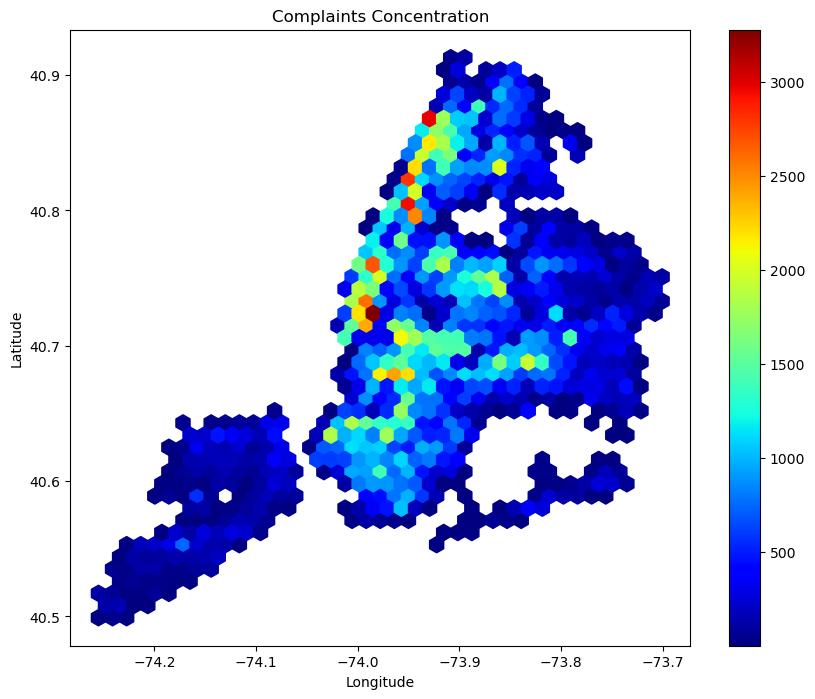

In [94]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.hexbin(data_frame['Longitude'], data_frame['Latitude'], gridsize=40, cmap='jet', mincnt=1)
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Complaints Concentration')
plt.show()


We have considered a complaints survey based data, where each row represents some sort of complaint raised at a specific latitude, longitude. So from the hexbin graph we can see concentrations of these complaints, and from the graph we can also infer that a region is with higher complaints is making surrounding regions also to have somewhat higher complaints.

And coming to the code we have simply read the data, and dropped the NA values, and then plotted the hexbin graph with the required parameters. We have set the gridsize to 40 and cmap is used to set the color mapping used for the graph. And without mincnt parameter we would be having every part of the plot filled with some color, which won't look good.